# Machine Learning, Module 2
## **Linear Classification**
All you need to know

In [1]:
#Set the width of notebook

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [256]:
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [257]:
np.set_printoptions(suppress=True)
#Not using scientific numbers in numpy


    !py -3.7 -m pip install six

The first time we instal mglearn library

    !py -3.7 -m pip install mglearn
    
mglearn is a library by O'Reilly


# **Linear models for Binary classification**
$$y_p = w_0 . x_0 + w_1 . x_1 + ... + w_p . x_p + b$$

$p:$ number of features(columns)

 A (binary) linear classifier is a classifier that separates two classes using a line, a plane, or a hyperplane

> ### *Logistic Regression*


- implemented in linear_model.LogisticRegression

- more info: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

> ### *Linear Support Vector Machines (linear SVMs)*

- implemented in svm.LinearSVC.

- more info: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [258]:
plt.style.use('seaborn-darkgrid')

C:\Users\Behnam\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


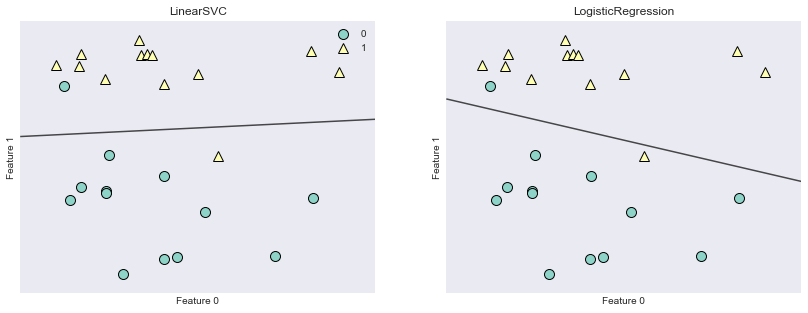

In [259]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for model, ax in zip([LinearSVC(max_iter = 10000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

### By default, both models apply an $l_2$ regularization, in the same way that $Ridge$ does for regression.

# **$C:$**  Inverse Regularization Term 

### <span style="color:red">**(hyper Parameter) $$C =  \frac{1}{\lambda}$$** </span>



smaller values specify stronger regularization

> ### *High value for $C$:* 

- Try to fit the training set as best as possible 
- Less Regularization, more complex model
- Overfitting

>### *Low value of $C$:* 

- more coefficients ($w$) close to zero
- more restricted

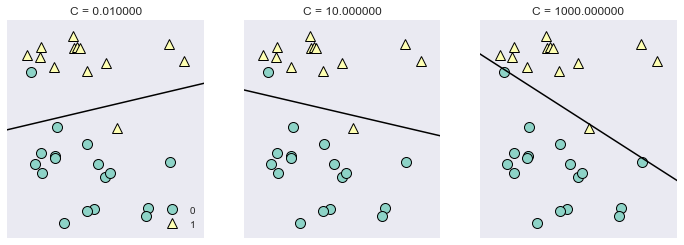

In [260]:
mglearn.plots.plot_linear_svc_regularization()


### Effect of C on the model:
- The model on the righthand side is likely overfitting because C is very high (less regularization)

- As $C$ increases, the model tries to fit the dataset better

## Analyze on Breast Cancer Dataset

In [261]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
type(cancer) #= pd.DataFrame(cancer)

sklearn.utils.Bunch

### Converting the Bunch object into a DataFrame

In [262]:
df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_cancer['diagnosed'] = pd.Series(cancer.target)
df_cancer
#converting the Bunch object into a dataframe

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosed
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [263]:
cols = df_cancer.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_cancer = df_cancer[cols]
df_cancer
#Rearranging the columns in a way that target column be the first column

,diagnosed,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [264]:
target = 'diagnosed' 
predictors = df_cancer.columns[1:]

In [265]:
y = df_cancer[target]
X = df_cancer[predictors]

In [266]:
y.value_counts()

1    357
0    212
Name: diagnosed, dtype: int64

In [267]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

### <span style="color:red">**Stratify:** </span>


#### Stratify makes sure that the distribution remains consistant in training and test set 
- Balance of classes remain the same

- Always set `stratify = y`

In [268]:
logreg = LogisticRegression(max_iter = 10000).fit(X_train, y_train)

### **penalty:**
- by default we have l2 penalty, elasticnet is the combination of l1 and l2

### **$C$:**

- is sepecifies the strength of the regularization but it's the opposite of lambda

### **tol:**

- the percision we want from the model to converge before stops the iterations

### **max_iter:**

- is the number of iterations before the model stops

### **n_jobs:**

- how many cores do you want to use? (-1 for the maximum core usage)

In [269]:
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.958


### Training and test set performance are very close, it is likely that we are underfitting.

Let’s try to increase C to fit a more flexible model

In [270]:
logreg100 = LogisticRegression(C=100, max_iter = 10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.979
Test set score: 0.965


Increasing C to 100 creates a more complex model with higher score on test data

> What if we decrease the C?

In [271]:
logreg001 = LogisticRegression(C=0.01, max_iter = 10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.951


In [272]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i.ibb.co/LYVftjV/Sweet-Spot.jpg")

As expected, when moving more to the left along the scale shown in
Figure above from an already underfit model, both training and test set
accuracy decrease relative to the default parameters

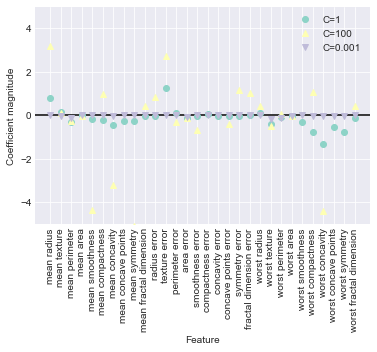

In [273]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

## Using the $l_1$ model for more interpretability (Lasso)

more columns with coefficiend = 0

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


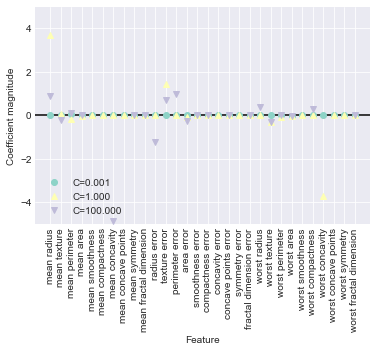

In [274]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, max_iter = 10000, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

# **Linear models for multiclass classification**

### How it works?

A common technique to extend a binary
classification algorithm to a multiclass classification algorithm is the
one-vs.-rest approach.

In the one-vs.-rest approach, a binary model
is learned for each class that tries to separate that class from all of
the other classes, resulting in as many binary models as there are
classes. 

To make a prediction, all binary classifiers are run on a test
point. The classifier that has the highest score on its single class
“wins,” and this class label is returned as the prediction.



>Having one binary classifier per class results in having one vector of
coefficients (w) and one intercept (b) for each class

In [275]:
plt.style.use('dark_background')

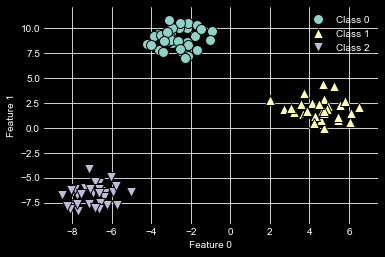

In [276]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [277]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


In [278]:
linear_svm.coef_

array([[-0.17,  0.23],
       [ 0.48, -0.07],
       [-0.19, -0.2 ]])

In [279]:
linear_svm.intercept_

array([-1.08,  0.13, -0.09])

 For  each class:
 
### $$y_p = w_1.x_1 + w_2.x_2 + b$$

- Because we have 2 columns for prediction

> We see that the shape of the coef_ is (3, 2), meaning that each row
of coef_ contains the coefficient vector for one of the three classes
and each column holds the coefficient value for a specific feature
(there are two in this dataset).

>The intercept_ is now a one dimensional
array, storing the intercepts for each class

### Let’s visualize the lines given by the three binary classifiers

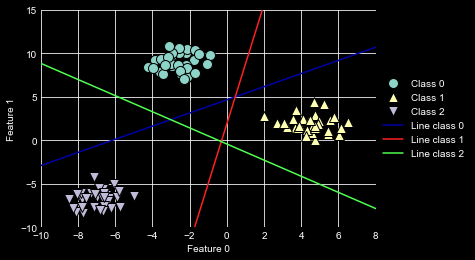

In [280]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

### But what about the triangle in the middle of the plot? 

>All three binary
classifiers classify points there as “rest.” Which class would a point
there be assigned to? The answer is the one with the highest value
for the classification formula: the class of the closest line

Text(0, 0.5, 'Feature 1')

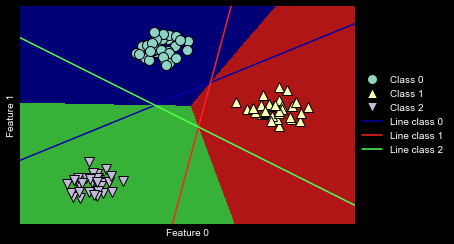

In [281]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Large values for alpha or small values for $C$
> mean simple models.

### If you assume that only a few of your features are actually important
> you should use $l_1$, Lasso ($l_1$ will use only a few features)

### Otherwise 
> you should default to $l_2$, $Ridge$

If your
data consists of hundreds of thousands or millions of samples, you
might want to use the 
### solver = 'sag'  
option in
LogisticRegression and Ridge, which can be faster than the default on large datasets.

### Linear models often perform well when the number of features is large compared to the number of samples

# **More examples:**

### Binary Linear Classification

 A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary.

In [363]:
dataset = pd.read_csv(r'C:\Users\Behnam\Downloads\Python\Datasets\Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [364]:
#We only want these 3 columns for prediction
df = dataset[['Purchased', 'Age', 'EstimatedSalary']]
df

,Purchased,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,0,26,43000
3,0,27,57000
4,0,19,76000
...,...,...,...
395,1,46,41000
396,1,51,23000
397,1,50,20000
398,0,36,33000


In [365]:
target = 'Purchased'
predictors = df.columns[1:]

In [366]:
y = df[target]
X = df[predictors]

In [367]:
buyer = df.loc[y == 1]
# filter out the applicants that bought 

not_buyer = df.loc[y == 0]
# filter out the applicants that din't buy

In [368]:
not_buyer, buyer

(     Purchased  Age  EstimatedSalary
 0            0   19            19000
 1            0   35            20000
 2            0   26            43000
 3            0   27            57000
 4            0   19            76000
 ..         ...  ...              ...
 377          0   42            53000
 380          0   42            64000
 387          0   39            71000
 394          0   39            59000
 398          0   36            33000
 
 [257 rows x 3 columns],      Purchased  Age  EstimatedSalary
 7            1   32           150000
 16           1   47            25000
 17           1   45            26000
 18           1   46            28000
 19           1   48            29000
 ..         ...  ...              ...
 393          1   60            42000
 395          1   46            41000
 396          1   51            23000
 397          1   50            20000
 399          1   49            36000
 
 [143 rows x 3 columns])

### Plotting 2 classes

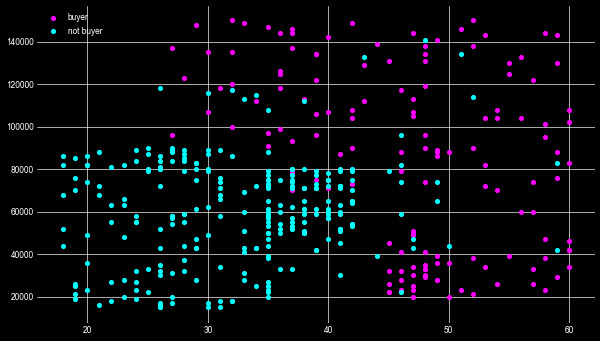

In [369]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(12, 7), dpi=60,)
plt.scatter(buyer.Age, buyer.EstimatedSalary, s=10, label='buyer', linewidth=3, color = 'magenta')
plt.scatter(not_buyer.Age, not_buyer.EstimatedSalary, s=10, label='not buyer', linewidth=3, color ='cyan')
plt.legend()
plt.show()

### Splitting the dataset into the Training set and Test set

In [370]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 0)

## **Feature Scaling**
- When the magnitude of features are very different

### StandardScaler:

$$ \frac{x - \mu}{\sigma} $$

$\mu$: mean of all $X$ values

$\sigma$: standrad deviation

### RobustScaler:

$$ \frac{x - M}{Q_3 - Q_1} $$

$M$: Median of all $X$ values

$Q_3 - Q_1$: 75% - 25% percentiles

### MinMaxScaler:
$$\frac{x -x_{min}} {x_{max} -x_{min}}$$

In [375]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

## **Polynomial Features**

In [376]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6).fit(X_train_Scaled) #Creates new features upto degree of 6 out of initial features(for X)
X_train_poly = poly.transform(X_train_Scaled)
X_test_poly = poly.transform(X_test_Scaled)

In [374]:
print(f" X_train: {X_train.shape}")
print(f" X_test.shape: {X_train_poly.shape}")

 X_train: (300, 2)
 X_test.shape: (300, 28)


In [377]:
X_train = X_train_poly
X_test = X_test_poly

### Creating the  model

In [350]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [351]:
y_pred = classifier.predict(X_test)
y_pred[:10]

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

#### __predict_proba__  returns estimates for all classes, where classes are ordered as they are in self.classes_.

- So in this particular example because `classifier.classes_` is `[0, 1]`:

> the first column is probability of class 0, P(Y=0|X)

> the second column is probability of class 1, P(Y=1|X)

In [352]:
classifier.classes_

array([0, 1], dtype=int64)

### y_pred_proba: 

- for every row, each column with higher probability is the predicted class coresponding to that row.

- In this example, first class is 0 and 2nd class is 1 (`classifier.classes_`)

In [353]:
y_pred_proba = classifier.predict_proba(X_test)
y_pred_proba[:10]

array([[0.89, 0.11],
       [0.27, 0.73],
       [0.79, 0.21],
       [0.7 , 0.3 ],
       [0.13, 0.87],
       [0.89, 0.11],
       [0.95, 0.05],
       [0.55, 0.45],
       [0.9 , 0.1 ],
       [0.99, 0.01]])

### jaccard index
Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.



In [380]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_pred)

0.5476190476190477

### **Confusion Matrix**

In [355]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[58,  6],
       [13, 23]], dtype=int64)

In [356]:
(classifier.coef_, classifier.intercept_)

(array([[2.2 , 1.16]]), array([-1.09]))

In [299]:
classifier.score(X_test, y_test)

0.64

plt.style.use('bmh')

### Comparing Logistic Regression with Naive Bayes and SVM

In [300]:
from sklearn import metrics 
y_pred_lr =  classifier.predict(X_test)
print("Logistic Regression model accuracy(in %):", classifier.score(X_test, y_test)*100)


Logistic Regression model accuracy(in %): 64.0


In [301]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
  
# making predictions on the testing set 
y_pred_nb = gnb.predict(X_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", gnb.score(X_test, y_test)*100)


Gaussian Naive Bayes model accuracy(in %): 85.0


In [302]:
from sklearn import svm

svm = svm.SVC().fit(X_train, y_train)
y_pred_svm = svm.predict(X_test) 
print("Support Vector Machines model accuracy(in %):", svm.score(X_test, y_test)*100)


Support Vector Machines model accuracy(in %): 76.0


## **Crossvalidation:**

#### No need to train the model before cross validation!

>Because it's a Classification problem , we need to set the scoring to 'accuracy'

In [383]:
estimators = {
    'LogisticRegression C=0.01': LogisticRegression(C=0.01, max_iter=10000),
    'LogisticRegression C=1': LogisticRegression(max_iter=10000),
    'LogisticRegression C=100': LogisticRegression(C=100, max_iter=10000),
    'LogisticRegression L1': LogisticRegression(solver='saga', penalty = 'l1', max_iter=10000)
}


### No need to train the model before cross validation!

>Because it's a Regression problem , we need to set the scoring to 'accuracy'

In [388]:
from sklearn.model_selection import KFold, cross_val_score

for estimator_name, estimator_object in estimators.items():
     kfold = KFold(n_splits=4, random_state=6 , shuffle=True)
     scores = cross_val_score(estimator_object, X_train, y_train, cv=kfold, scoring='accuracy')
     
     print(f'{estimator_name:>26}: ' + f'mean of r2 scores = {scores.mean():.5f}')

 LogisticRegression C=0.01: mean of r2 scores = 0.83667
    LogisticRegression C=1: mean of r2 scores = 0.90000
  LogisticRegression C=100: mean of r2 scores = 0.89000
     LogisticRegression L1: mean of r2 scores = 0.88000


### The best model has L1 with C=1, now we train the model with all train set

In [305]:
clf_final = LogisticRegression(solver='saga', penalty = 'l1', max_iter=10000).fit(X_train, y_train)
clf_final

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [306]:
print(f"Score for test set: {clf_final.score(X_test, y_test)}")

Score for test set: 0.64


## Ploting the Desicion Boundry

In [307]:
plt.style.use('dark_background')

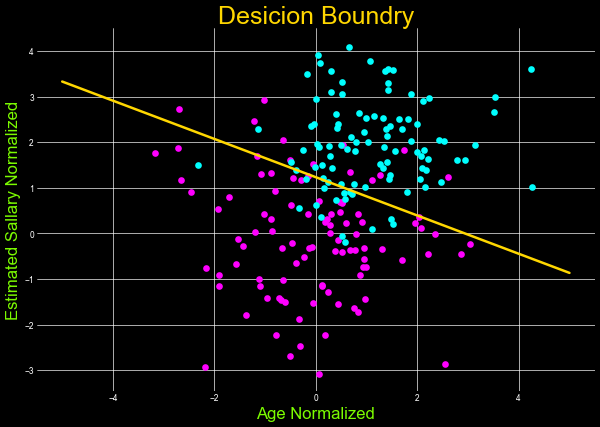

In [308]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import scipy
from sklearn import svm
from matplotlib.pyplot import figure




mu_vec1 = np.array([0,0])
cov_mat1 = np.array([[2,0],[0,2]])
x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1, 100)
mu_vec1 = mu_vec1.reshape(1,2).T # to 1-col vector

mu_vec2 = np.array([1,2])
cov_mat2 = np.array([[1,0],[0,1]])
x2_samples = np.random.multivariate_normal(mu_vec2, cov_mat2, 100)
mu_vec2 = mu_vec2.reshape(1,2).T


fig = plt.figure(figsize=(12, 8), dpi=60)


plt.scatter(x1_samples[:,0],x1_samples[:,1], c= 'magenta', linewidth=2)
plt.scatter(x2_samples[:,0],x2_samples[:,1], c= 'cyan', linewidth=2)

X = np.concatenate((x1_samples,x2_samples), axis = 0)
Y = np.array([0]*100 + [1]*100)

C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel = 'linear',  gamma=0.7, C=C )
clf.fit(X, Y)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.xlabel('Age Normalized', color='lawngreen',fontsize=20)
plt.ylabel('Estimated Sallary Normalized', color='lawngreen',fontsize=20)
plt.title('Desicion Boundry', color = 'gold', fontsize=30)
plt.plot(xx, yy, 'k-', c= 'gold', linewidth=3)

# Multi-Class Classification with Logistic Regression

In [309]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=[
    "Sepal length", 
    "Sepal width", 
    "Petal length",
    "Petal width",
    "Species"
])
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [310]:
df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### We have 3 classes

In [311]:
c = df.Species.astype('category')

d = dict(enumerate(c.cat.categories))
print (d)

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}


### Each category is replaced by a number

In [312]:
df['Species'] = c.cat.codes
#Convert categorical values into numbers
df

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [313]:
setosa = df.loc[y == 0]
# filter out the applicants that bought 

versicolor = df.loc[y == 1]
# filter out the applicants that din't buy

virginica = df.loc[y == 2]

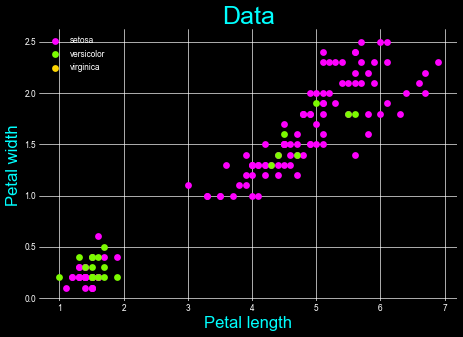

In [314]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(9, 6), dpi=60,)
plt.scatter(setosa['Petal length'], setosa['Petal width'], s=10, label='setosa', linewidth=5, color = 'magenta')
plt.scatter(versicolor['Petal length'], versicolor['Petal width'], s=10, label='versicolor', linewidth=5, color ='lawngreen') 
plt.scatter(virginica['Petal length'], virginica['Petal width'], s=10, label='virginica', linewidth=5, color ='gold') 
plt.legend(loc = 2)

plt.xlabel('Petal length', color='aqua',fontsize=20)
plt.ylabel('Petal width', color='aqua',fontsize=20)
plt.title('Data', color='aqua',fontsize=30)
plt.show()

In [315]:
#Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.0,3.5,1.3,0.3,0
1,5.0,2.3,3.3,1.0,1
2,6.2,2.8,4.8,1.8,2
3,5.6,2.7,4.2,1.3,1
4,6.0,2.2,5.0,1.5,2


In [316]:
#Rearranging the dataframe so that the target column is the firs column
# Get the DataFrame column names as a list
clist = list(df.columns)

# Rearrange list the way you like 
clist_new = clist[-1:]+clist[:-1]   # brings the last column in the first place

# Pass the new list to the DataFrame - like a key list in a dict 
df = df[clist_new]
df.head()

,Species,Sepal length,Sepal width,Petal length,Petal width
0,0,5.0,3.5,1.3,0.3
1,1,5.0,2.3,3.3,1.0
2,2,6.2,2.8,4.8,1.8
3,1,5.6,2.7,4.2,1.3
4,2,6.0,2.2,5.0,1.5


In [317]:
target= df.columns[0]
predictors = df.columns[1:]

In [318]:
y = df[target]
X = df[predictors]

In [319]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 0)

In [320]:
lr = LogisticRegression(multi_class = 'ovr').fit(X_train, y_train)

In [321]:
lr.score(X_test, y_test)

0.9473684210526315

In [322]:
X_train.head()

,Sepal length,Sepal width,Petal length,Petal width
31,5.7,2.8,4.1,1.3
5,5.1,3.4,1.5,0.2
21,5.1,3.5,1.4,0.2
131,6.1,3.0,4.6,1.4
19,6.2,3.4,5.4,2.3


In [323]:
lr.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [324]:
lr.coef_

array([[-0.45,  0.83, -2.15, -0.95],
       [-0.2 , -2.19,  0.66, -1.15],
       [-0.28, -0.3 ,  2.54,  2.26]])

### We have 3 classes and each class has 4 coeeficients( bacause each column has 1 coefficient)

In [325]:
lr.intercept_

array([  6.45,   5.88, -13.74])

### 3 classes and 3 intercepts

In [326]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 1, 2, 1,
       1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 1, 2], dtype=int8)

## **Gradient Boosting for classification:**

- GB builds an additive model in a forward stage-wise fashion; 

- it allows for the optimization of arbitrary differentiable loss functions. 
- In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function.
- Binary classification is a special case where only a single regression tree is induced.

In [327]:
cl = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = cl.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0, 1, 2, 1,
       1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 1, 2], dtype=int8)

## **The balanced accuracy:**
- in binary and multiclass classification problems to deal with imbalanced datasets.

- It is defined as the average of recall obtained on each class.

- The best value is 1 and the worst value is 0 when adjusted=False

In [328]:
from sklearn.metrics import balanced_accuracy_score
print(f"The balanced accuracy score is      {balanced_accuracy_score(y_test, y_pred):0.3f}")
print(f"The mean accuracy accuracy score is {cl.score(X_test, y_test):0.3f}")


The balanced accuracy score is      0.972
The mean accuracy accuracy score is 0.974


In [329]:
estimators = {
    'LogisticRegression C=0.01': LogisticRegression(C=0.01, max_iter=10000),
    'LogisticRegression C=1': LogisticRegression(max_iter=10000),
    'LogisticRegression C=100': LogisticRegression(C=100, max_iter=10000),
    'LogisticRegression L1': LogisticRegression(solver='saga', penalty = 'l1', max_iter=10000),
    'Gradient Boosting Classifier' : GradientBoostingClassifier( n_estimators = 200)
}


### No need to train the model before cross validation!

>Because it's a Regression problem , we need to set the scoring to 'accuracy'

In [330]:
from sklearn.model_selection import KFold, cross_val_score

for estimator_name, estimator_object in estimators.items():
     kfold = KFold(n_splits=4, random_state=6 , shuffle=True)
     scores = cross_val_score(estimator_object, X_train, y_train, cv=kfold, scoring='accuracy')
     #  scoring='roc_auc_ovr'
     print(f'{estimator_name:>16}: ' + f'mean of r2 scores = {scores.mean():.5f}')

LogisticRegression C=0.01: mean of r2 scores = 0.80357
LogisticRegression C=1: mean of r2 scores = 0.94643
LogisticRegression C=100: mean of r2 scores = 0.95536
LogisticRegression L1: mean of r2 scores = 0.94643
Gradient Boosting Classifier: mean of r2 scores = 0.93750
